In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
import seaborn as sns

import scipy.stats as stats


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [5]:
credit_default = pd.read_csv('https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/credit_card_defaults.csv')
credit_default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Rename Column

In [6]:
# change default payment next month name to DEFAULT
credit_default = credit_default.rename(columns={'default payment next month': 'DEFAULT'})


In [7]:
credit_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

## Confusion Matrix Function

In [8]:
# Visualizing confusion matrices for each classifier
# Here's another function for plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')If we have a bumpy but somewhat smooth boundary, which of these methods is likely to work best on out of sample data: Logistic, LDA, QDA, kNN?  Why?
    plt.show()

## Decision Tree Model Experiment

In [9]:
# Choose the features X and target y
X = credit_default[["LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]]
y = credit_default["DEFAULT"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit it to the training data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Calculate the accuracy of the model    
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7233333333333334


Object `Why` not found.


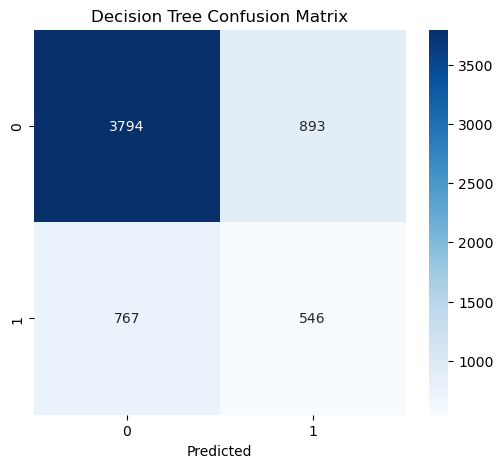

In [10]:
# create a confustion matrix for the decision tree
feature_names = ["LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
target_names = ["0", "1"]
plot_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix')


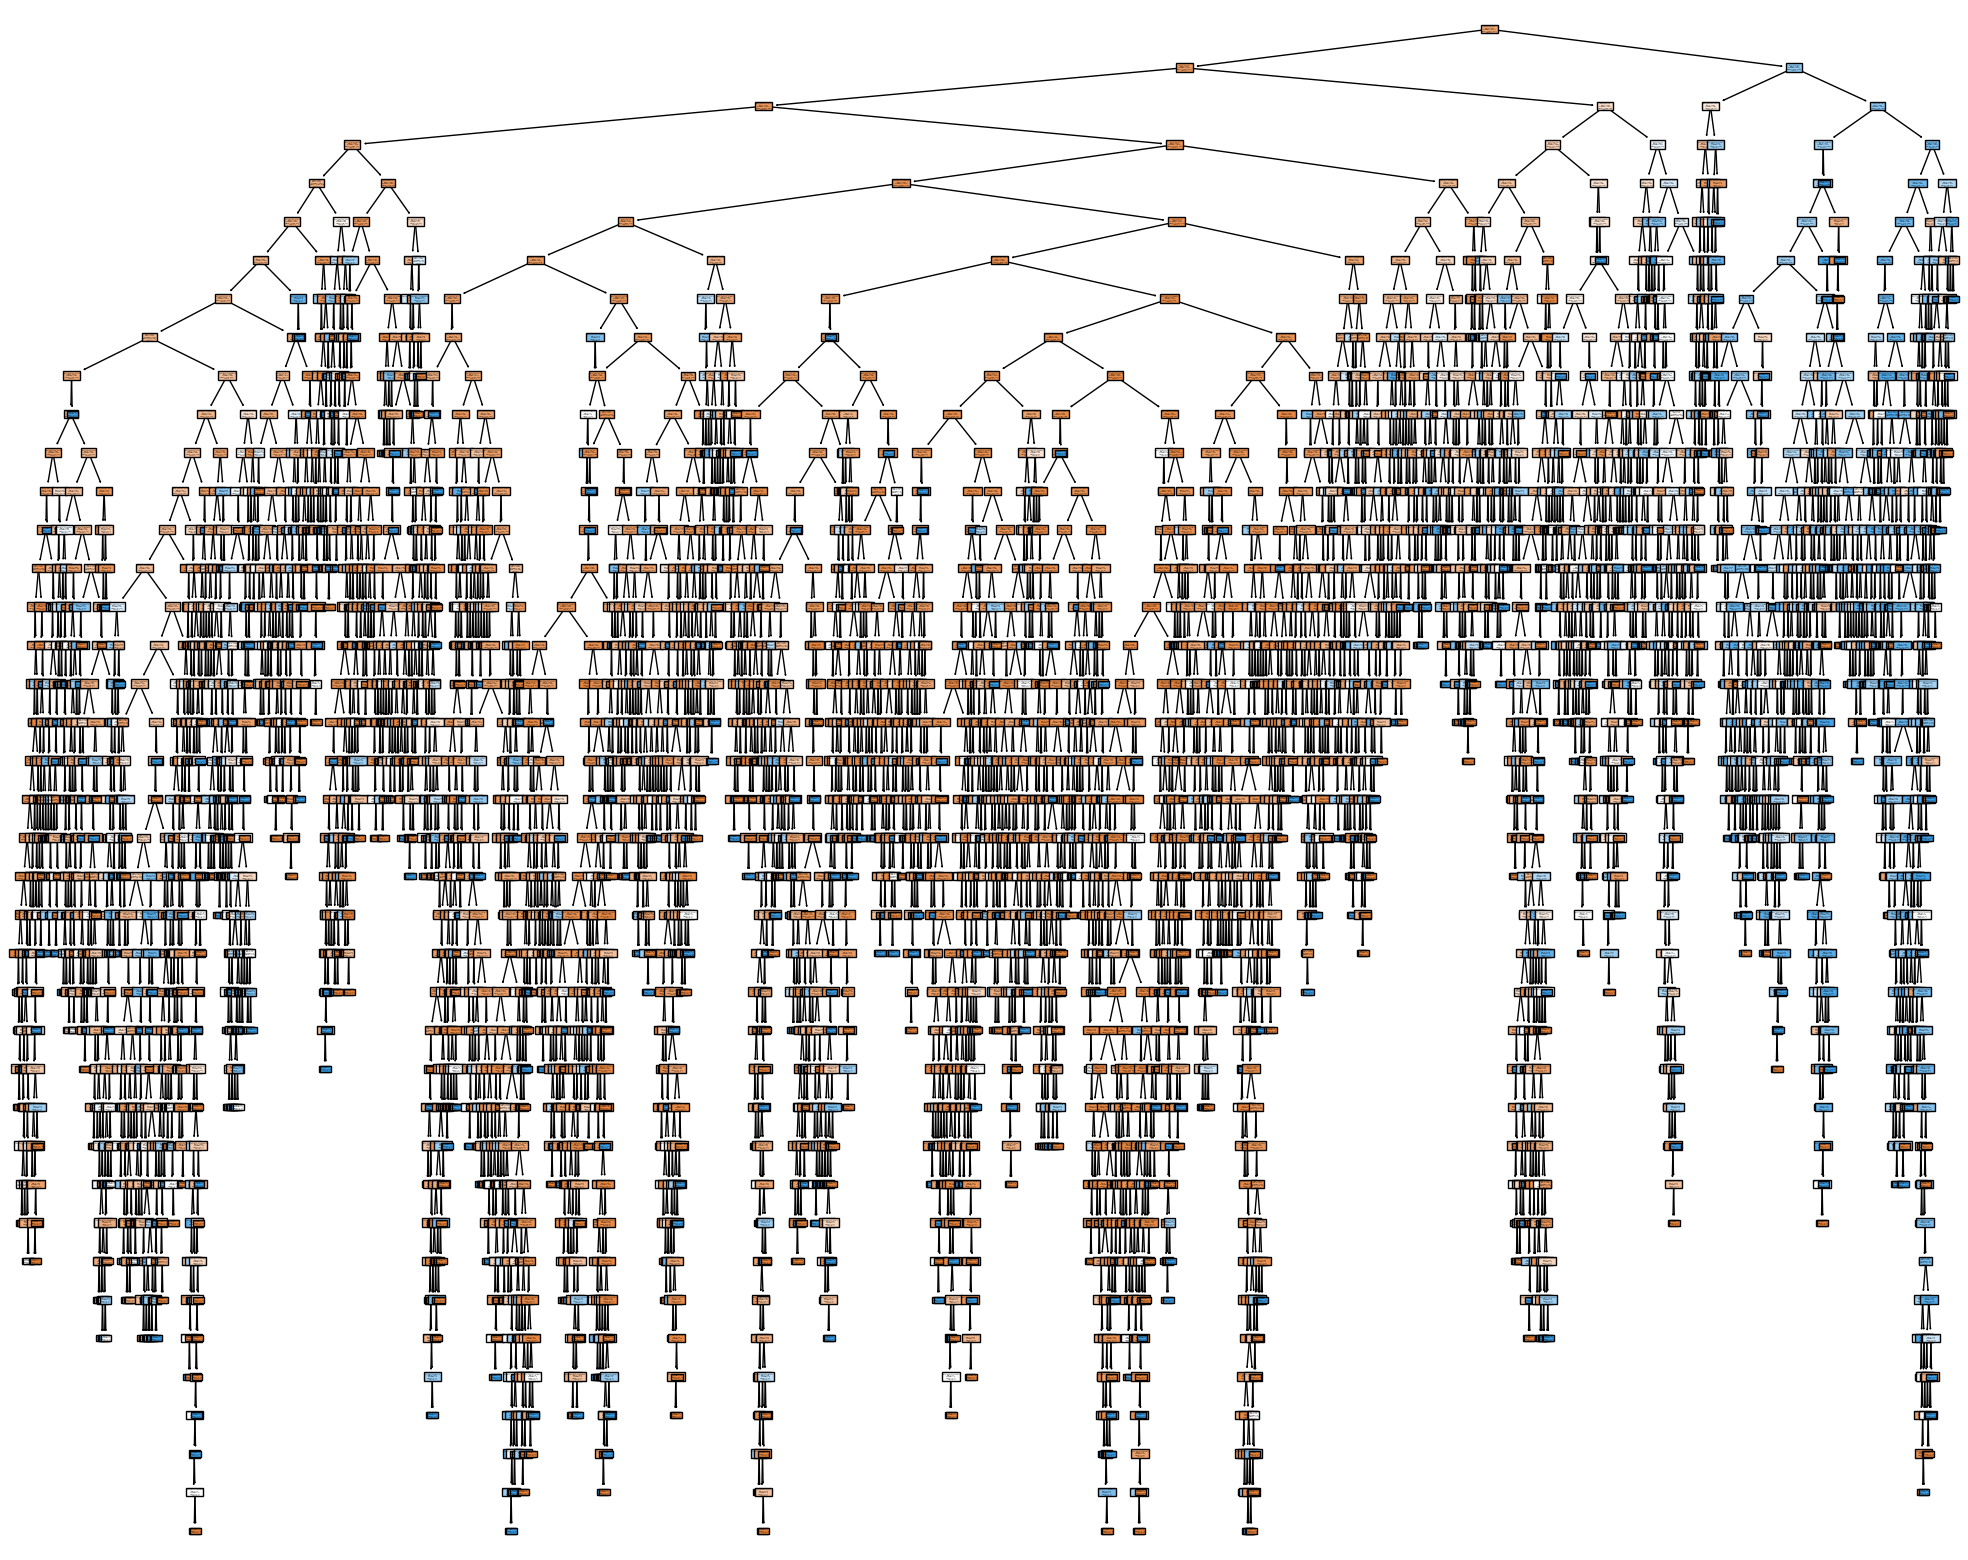

In [17]:
dt_pre_pruned = DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)

# Train the model
dt_pre_pruned.fit(X_train, y_train)
## create a plot of the Decision Tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dtree, feature_names=feature_names, class_names=target_names, filled=True)

Accuracy: 0.8195
Object `Why` not found.


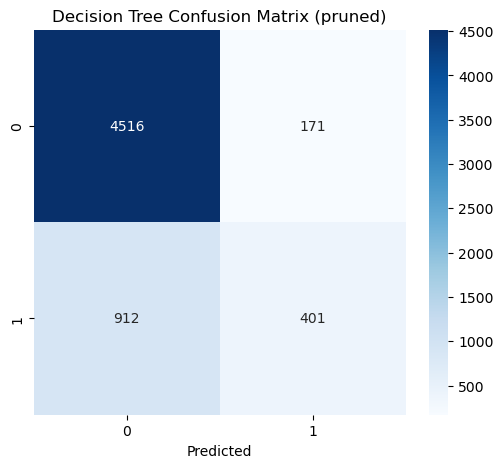

In [18]:
y_pred = dt_pre_pruned.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plot_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix (pruned)')

In [21]:
# Cross validation for decision tree
scores = cross_val_score(dtree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.02)


RBF Kernel SVM accuracy: 78.12%
Object `Why` not found.


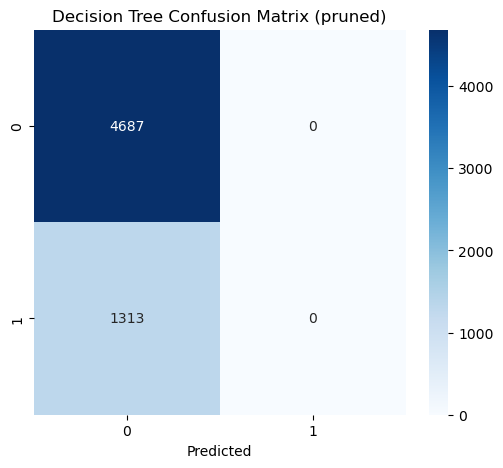

In [22]:
# Create an RBF kernel SVM model
rbf_svm = SVC(kernel='rbf')

# Train the model on the training data
rbf_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = rbf_svm.predict(X_test)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel SVM accuracy: {accuracy_rbf * 100:.2f}%")

plot_confusion_matrix(y_test, y_pred_rbf, 'Decision Tree Confusion Matrix (pruned)')


In [23]:


cv_scores_rbf = cross_val_score(rbf_svm, X, y, cv=5)  # 5-fold cross-validation
print(f"RBF Kernel SVM cross-validation accuracy: {cv_scores_rbf.mean() * 100:.2f}%")

RBF Kernel SVM cross-validation accuracy: 77.88%
